## Kaggle 1

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import datetime as dt
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
import xgboost as xgb
warnings.filterwarnings("ignore")

In [ ]:
df_train = pd.read_csv('Trout_training.csv')
df_test = pd.read_csv('Trout_testing_features.csv')

In [ ]:
df_train['Date_Time'] = pd.to_datetime(df_train['Date_Time'])
df_train['Date_Time'] = df_train['Date_Time'].dt.strftime('%-m/%-d/%Y %-H:%M')
df_train['Date_Time'] = pd.to_datetime(df_train['Date_Time'])

In [ ]:
df_test['Date_Time'] = pd.to_datetime(df_test['Date_Time'])
df_test['Date_Time'] = df_test['Date_Time'].dt.strftime('%-m/%-d/%Y %-H:%M')
df_test['Date_Time'] = pd.to_datetime(df_test['Date_Time'])

In [ ]:
df_training = df_train.pivot(index='Date_Time',columns='Depth_m')['Water_Temp_C']
df_testing = df_test.pivot(index='Date_Time',columns='Depth_m')['Water_Temp_C']

In [ ]:
df_training = df_training.dropna()
df_testing = df_testing.dropna()

In [ ]:
df_training

Depth_m,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,14.5,16.5,18.5,20.5
Date_Time,,,,,,,,,,,,,,,,
2012-04-20 00:00:00,5.257,5.257,5.257,5.205,5.205,5.154,5.231,5.128,5.102,5.076,4.792,4.818,4.766,4.792,4.792,4.818
2012-04-20 01:00:00,5.205,5.231,5.231,5.179,5.205,5.154,5.231,5.128,5.024,4.999,4.792,4.818,4.766,4.792,4.792,4.792
2012-04-20 02:00:00,5.231,5.231,5.231,5.154,5.179,5.128,5.154,4.973,4.895,4.895,4.792,4.792,4.740,4.792,4.792,4.792
2012-04-20 03:00:00,5.205,5.231,5.205,5.154,5.154,5.102,5.128,4.999,4.895,4.921,4.766,4.818,4.766,4.792,4.792,4.766
2012-04-20 04:00:00,5.205,5.231,5.154,5.050,5.050,4.999,5.076,4.999,4.947,4.973,4.818,4.844,4.792,4.792,4.792,4.766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-19 19:00:00,0.412,0.852,0.907,0.962,1.071,0.989,1.289,1.289,1.453,1.398,1.561,1.534,1.724,1.778,2.155,2.503
2018-04-19 20:00:00,0.412,0.852,0.907,0.962,1.071,0.989,1.289,1.289,1.453,1.398,1.561,1.534,1.724,1.805,2.155,2.503
2018-04-19 21:00:00,0.412,0.852,0.907,0.962,1.071,0.989,1.289,1.289,1.453,1.398,1.561,1.534,1.724,1.778,2.155,2.503


#### Compare multiple models' mse scores in 2 ways:

1. X: Every temperature datasets except when depth is 10.5m and 9.5m

   Y: Lake temperature when depth is 9.5m
   
2. X: Every temperature datasets except when depth is 10.5m and 11.5m

   Y: Lake temperature when depth is 11.5m
   

In [ ]:
train_X = df_training.drop(columns=[10.5, 11.5])
train_y = df_training[11.5]

test_X = df_testing.drop(columns=[11.5])
test_y = df_testing[11.5]

In [ ]:
# Linear regression
def linreg(X_train, X_test, y_train, y_test):
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    prediction = linreg.predict(X_test)
    linreg_mse = mean_squared_error(y_test, prediction)
    return linreg_mse


# Random Forest
def rf(X_train, X_test, y_train, y_test):
    rf = RandomForestRegressor(random_state=0)
    rf.fit(X_train,y_train)
    prediction = rf.predict(X_test)
    rf_mse = mean_squared_error(y_test, prediction)
    return rf_mse


# Ridge
def ridge(X_train, X_test, y_train, y_test):
    ridge = Ridge()
    ridge.fit(X_train, y_train)
    prediction = ridge.predict(X_test)
    ridge_mse = mean_squared_error(y_test, prediction)
    return ridge_mse


# Lasso Regression
def lasso(X_train, X_test, y_train, y_test):
    lasso = Lasso()
    lasso.fit(X_train, y_train)
    prediction = lasso.predict(X_test)
    lasso_mse = mean_squared_error(y_test.values, prediction)
    return lasso_mse


# k Nearest Neighbor
def knn(X_train, X_test, y_train, y_test):
    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    knn_mse = mean_squared_error(y_test, prediction)
    return knn_mse


# Support Vector Regression
def svr(X_train, X_test, y_train, y_test):
    svr = SVR()
    svr.fit(X_train, y_train)
    prediction = svr.predict(X_test)
    svc_mse = mean_squared_error(y_test, prediction)
    return svc_mse


# XGBoost
def xgbr(X_train, X_test, y_train, y_test):
    xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', random_state=0, n_estimators = 50)
    xg_reg.fit(X_train,y_train)
    xg_preds = xg_reg.predict(X_test)
    xg_mse = mean_squared_error(y_test, xg_preds)
    return xg_mse


# Gradient Boosting
def gbr(X_train, X_test, y_train, y_test):
    gra_reg = GradientBoostingRegressor(random_state=0, n_estimators = 50)
    gra_reg.fit(X_train,y_train)
    gra_preds = gra_reg.predict(X_test)
    gra_mse = mean_squared_error(y_test, gra_preds)
    return gra_mse


# Ada Boost
def ada(X_train, X_test, y_train, y_test):
    ada_reg = AdaBoostRegressor(random_state=0, n_estimators = 50)
    ada_reg.fit(X_train,y_train)
    ada_preds = ada_reg.predict(X_test)
    ada_mse = mean_squared_error(y_test, ada_preds)
    return ada_mse


# MLP
def mlp(X_train, X_test, y_train, y_test):
    mlp_regr = MLPRegressor(random_state=1, max_iter=700, activation = 'tanh').fit(train_X, train_y)
    predictions=mlp_regr.predict(test_X)
    mlp_mse = mean_squared_error(test_y,predictions)
    return mlp_mse

In [ ]:
lasso_mse = lasso(train_X,test_X,train_y,test_y)
print('Lasso Regression: ', lasso_mse)

ridge_mse = ridge(train_X,test_X,train_y,test_y)
print('Ridge Regression: ', ridge_mse)

linreg_mse = linreg(train_X,test_X,train_y,test_y)
print('Linear Regression: ', linreg_mse)

rf_mse = rf(train_X,test_X,train_y,test_y)
print('Random Forests Regression: ', rf_mse)

Lasso Regression:  0.19963411522091437
Ridge Regression:  0.01942498160434543
Linear Regression:  0.019426148975563776
Random Forests Regression:  0.011415276157881682


In [ ]:
xg_mse = xgbr(train_X,test_X,train_y,test_y)
print('XGBoost: ', xg_mse)

knn_mse = knn(train_X,test_X,train_y,test_y)
print('KNN Regression: ', knn_mse)

gbr_mse = gbr(train_X,test_X,train_y,test_y)
print('Gradient Boosting Regressor: ', gbr_mse)

ada_mse = ada(train_X,test_X,train_y,test_y)
print('Ada Boost Regressor: ', ada_mse)

mlp_mse = mlp(train_X,test_X,train_y,test_y)
print('MLP Regressor: ', mlp_mse)

XGBoost:  0.007850949101986198
KNN Regression:  0.08340909762100454
Gradient Boosting Regressor:  0.016561640095850805
Ada Boost Regressor:  0.13146481984055308
MLP Regressor:  0.031219086746196764


MSE score lowest ranking when predicting the first case scenario for when y is 9.5m:
1. MLP Regressor
2. XGBoost
3. Random Forest

MSE score lowest ranking when predicting the first case scenario for when y is 11.5m:
1. XGBoost
2. Random Forest
3. Ridge

So we will choose XGBoost since it has a high ranking for both cases.

In [ ]:
final_X = df_training.drop(columns=[10.5])
final_y = df_training[10.5]
final_X_test = df_testing.copy()

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', random_state=0, n_estimators = 50)
xg_reg.fit(final_X,final_y)
xg_preds = xg_reg.predict(final_X_test)

In [ ]:
Date_Time = pd.date_range('2018-04-20', periods=8760, freq='H').astype(str)
df_pred_xgb = pd.DataFrame({'Date_Time':Date_Time,
                            'Water_Temp_C':xg_preds})
df_pred_xgb.Date_Time = df_pred_xgb['Date_Time'].astype(str).tolist()
df_pred_xgb['Date_Time'] = pd.to_datetime(df_pred_xgb['Date_Time'])

<AxesSubplot:>

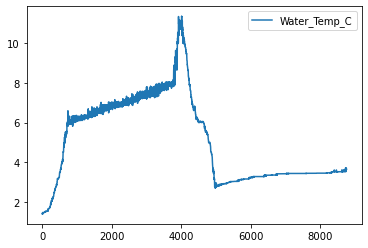

In [ ]:
df_pred_xgb.plot(y='Water_Temp_C')

In [ ]:
#df_pred_xgb.to_csv("./Trout_prediction.csv", index=False)

## Check

In [ ]:
df_pred_xgb['Depth_m'] = 10.5

In [ ]:
df_105 = df_train.loc[df_train['Depth_m'] == 10.5]

In [ ]:
pred_merge = pd.concat([df_pred_xgb, df_105], ignore_index=True)

In [ ]:
pred_merge

,Date_Time,Water_Temp_C,Depth_m
0,2018-04-20 00:00:00,1.395186,10.5
1,2018-04-20 01:00:00,1.395186,10.5
2,2018-04-20 02:00:00,1.389084,10.5
3,2018-04-20 03:00:00,1.389084,10.5
4,2018-04-20 04:00:00,1.389084,10.5
...,...,...,...
61263,2018-04-19 19:00:00,1.398000,10.5
61264,2018-04-19 20:00:00,1.398000,10.5
61265,2018-04-19 21:00:00,1.398000,10.5
61266,2018-04-19 22:00:00,1.398000,10.5


In [ ]:
pred_merge['year'] = pred_merge.Date_Time.dt.year 
pred_merge['month'] = pred_merge.Date_Time.dt.month

<AxesSubplot:xlabel='year,month'>

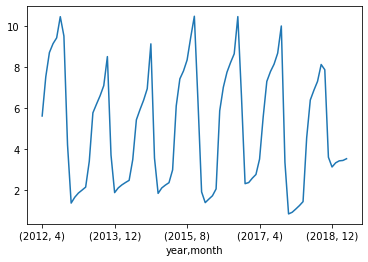

In [ ]:
temp=pred_merge.groupby(['year', 'month'])['Water_Temp_C'].mean()
temp.plot()

In [ ]:
check = pd.read_csv('Trout_testing_features.csv')
check['Date_Time'] = pd.to_datetime(check['Date_Time'])

In [ ]:
check = check.pivot(index='Date_Time',columns='Depth_m')['Water_Temp_C']

In [ ]:
df_pred_xgb['Depth_m'] = 10.5

In [ ]:
df_pred_xgb

,Date_Time,Water_Temp_C,Depth_m
0,2018-04-20 00:00:00,1.395186,10.5
1,2018-04-20 01:00:00,1.395186,10.5
2,2018-04-20 02:00:00,1.389084,10.5
3,2018-04-20 03:00:00,1.389084,10.5
4,2018-04-20 04:00:00,1.389084,10.5
...,...,...,...
8755,2019-04-19 19:00:00,3.641397,10.5
8756,2019-04-19 20:00:00,3.641397,10.5
8757,2019-04-19 21:00:00,3.641397,10.5
8758,2019-04-19 22:00:00,3.641397,10.5


In [ ]:
df_pred_xgb = df_pred_xgb.pivot(index='Date_Time',columns='Depth_m')['Water_Temp_C']

In [ ]:
pred_merge = pd.merge(df_pred_xgb, check, left_index=True, right_index=True)

In [ ]:
pred_merge

Depth_m,10.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,11.5,12.5,14.5,16.5,18.5,20.5
Date_Time,,,,,,,,,,,,,,,,
2018-04-20 00:00:00,1.395186,0.412,0.852,0.907,0.962,1.071,0.989,1.289,1.289,1.453,1.561,1.534,1.724,1.805,2.155,2.503
2018-04-20 01:00:00,1.395186,0.412,0.852,0.907,0.962,1.071,0.989,1.289,1.289,1.453,1.561,1.534,1.724,1.805,2.155,2.503
2018-04-20 02:00:00,1.389084,0.412,0.852,0.907,0.962,1.071,0.989,1.289,1.289,1.453,1.561,1.534,1.724,1.778,2.155,2.503
2018-04-20 03:00:00,1.389084,0.412,0.852,0.907,0.962,1.071,0.989,1.289,1.289,1.453,1.561,1.534,1.724,1.778,2.155,2.503
2018-04-20 04:00:00,1.389084,0.412,0.852,0.907,0.962,1.071,0.989,1.289,1.289,1.453,1.561,1.534,1.724,1.778,2.155,2.503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-19 19:00:00,3.641397,3.221,3.801,3.670,3.670,3.670,3.485,3.617,3.512,3.617,3.591,3.564,3.696,3.670,3.801,3.906
2019-04-19 20:00:00,3.641397,3.274,3.775,3.670,3.643,3.670,3.459,3.617,3.512,3.617,3.617,3.564,3.696,3.670,3.801,3.906
2019-04-19 21:00:00,3.641397,3.274,3.749,3.643,3.643,3.670,3.485,3.617,3.512,3.617,3.591,3.564,3.696,3.670,3.801,3.906


<AxesSubplot:xlabel='Date_Time'>

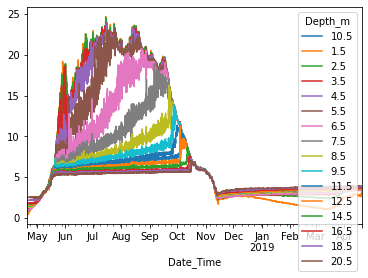

In [ ]:
pred_merge.plot()

## Try with dataset from 2013/4/20

In [ ]:
df_train = df_train[139831:]

In [ ]:
df_train

,Date_Time,Water_Temp_C,Depth_m
139831,2013-04-20 00:00:00,1.262,2.5
139832,2013-04-20 00:00:00,1.425,3.5
139833,2013-04-20 00:00:00,1.507,4.5
139834,2013-04-20 00:00:00,1.615,5.5
139835,2013-04-20 00:00:00,1.859,6.5
...,...,...,...
839210,2018-04-19 23:00:00,1.534,12.5
839211,2018-04-19 23:00:00,1.724,14.5
839212,2018-04-19 23:00:00,1.778,16.5
839213,2018-04-19 23:00:00,2.155,18.5


In [ ]:
df_train['Date_Time'] = pd.to_datetime(df_train['Date_Time'])
df_train['Date_Time'] = df_train['Date_Time'].dt.strftime('%-m/%-d/%Y %-H:%M')
df_train['Date_Time'] = pd.to_datetime(df_train['Date_Time'])

In [ ]:
df_training = df_train.pivot(index='Date_Time',columns='Depth_m')['Water_Temp_C']
df_training = df_training.dropna()

In [ ]:
final_X = df_training.drop(columns=[10.5])
final_y = df_training[10.5]
final_X_test = df_testing.copy()

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', random_state=0, n_estimators = 50)
xg_reg.fit(final_X,final_y)
xg_preds = xg_reg.predict(final_X_test)

In [ ]:
Date_Time = pd.date_range('2018-04-20', periods=8760, freq='H').astype(str)
df_pred_xgb = pd.DataFrame({'Date_Time':Date_Time,
                            'Water_Temp_C':xg_preds})
df_pred_xgb.Date_Time = df_pred_xgb['Date_Time'].astype(str).tolist()
df_pred_xgb['Date_Time'] = pd.to_datetime(df_pred_xgb['Date_Time'])

<AxesSubplot:>

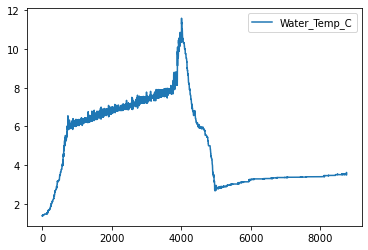

In [ ]:
df_pred_xgb.plot(y='Water_Temp_C')

In [ ]:
df_pred_xgb['Depth_m'] = 10.5

In [ ]:
pred_merge = pd.concat([df_pred_xgb, df_105], ignore_index=True)

In [ ]:
pred_merge['year'] = pred_merge.Date_Time.dt.year 
pred_merge['month'] = pred_merge.Date_Time.dt.month

<AxesSubplot:xlabel='year,month'>

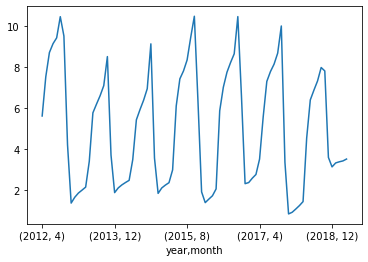

In [ ]:
temp=pred_merge.groupby(['year', 'month'])['Water_Temp_C'].mean()
temp.plot()

## Try with dataset from 2015/4/20

In [ ]:
df_train = df_train[419451:]

In [ ]:
df_train

,Date_Time,Water_Temp_C,Depth_m
559282,2016-04-19 09:00:00,2.047,14.5
559283,2016-04-19 09:00:00,2.316,16.5
559284,2016-04-19 09:00:00,2.530,18.5
559285,2016-04-19 09:00:00,2.797,20.5
559286,2016-04-19 10:00:00,1.967,1.5
...,...,...,...
839210,2018-04-19 23:00:00,1.534,12.5
839211,2018-04-19 23:00:00,1.724,14.5
839212,2018-04-19 23:00:00,1.778,16.5
839213,2018-04-19 23:00:00,2.155,18.5


In [ ]:
df_train['Date_Time'] = pd.to_datetime(df_train['Date_Time'])
df_train['Date_Time'] = df_train['Date_Time'].dt.strftime('%-m/%-d/%Y %-H:%M')
df_train['Date_Time'] = pd.to_datetime(df_train['Date_Time'])

In [ ]:
df_training = df_train.pivot(index='Date_Time',columns='Depth_m')['Water_Temp_C']
df_training = df_training.dropna()

In [ ]:
final_X = df_training.drop(columns=[10.5])
final_y = df_training[10.5]
final_X_test = df_testing.copy()

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', random_state=0, n_estimators = 50)
xg_reg.fit(final_X,final_y)
xg_preds = xg_reg.predict(final_X_test)

In [ ]:
Date_Time = pd.date_range('2018-04-20', periods=8760, freq='H').astype(str)
df_pred_xgb = pd.DataFrame({'Date_Time':Date_Time,
                            'Water_Temp_C':xg_preds})
df_pred_xgb.Date_Time = df_pred_xgb['Date_Time'].astype(str).tolist()
df_pred_xgb['Date_Time'] = pd.to_datetime(df_pred_xgb['Date_Time'])

<AxesSubplot:>

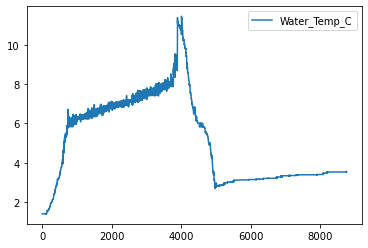

In [ ]:
df_pred_xgb.plot(y='Water_Temp_C')

In [ ]:
df_pred_xgb['Depth_m'] = 10.5

In [ ]:
pred_merge = pd.concat([df_pred_xgb, df_105], ignore_index=True)

In [ ]:
pred_merge['year'] = pred_merge.Date_Time.dt.year 
pred_merge['month'] = pred_merge.Date_Time.dt.month

<AxesSubplot:xlabel='year,month'>

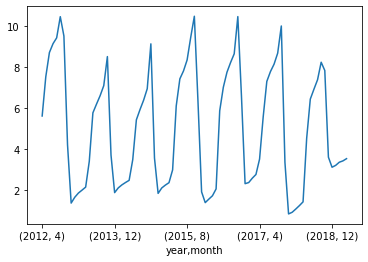

In [ ]:
temp=pred_merge.groupby(['year', 'month'])['Water_Temp_C'].mean()
temp.plot()

## Tune XGBoost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
def random_search_tuning():
    final_X = df_training.drop(columns=[10.5])
    final_y = df_training[10.5]

    params = {'max_depth': [3, 6, 10, 15],
              'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
              'subsample': np.arange(0.5, 1.0, 0.1),
              'colsample_bytree': np.arange(0.5, 1.0, 0.1),
              'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
              'n_estimators': [100, 250, 500, 750]
              }

    xgbclf = xgb.XGBRegressor(objective="reg:squarederror", random_state=0)
    clf = RandomizedSearchCV(estimator=xgbclf,
                             param_distributions=params,
                             n_iter=25,
                             n_jobs=4,
                             verbose=1)

    clf.fit(final_X, final_y)

    best_combination = clf.best_params_

    return best_combination

In [ ]:
random_search_tuning()

Above result:

Fitting 5 folds for each of 25 candidates, totalling 125 fits

{'subsample': 0.7,\
 'n_estimators': 750,\
 'max_depth': 6,\
 'learning_rate': 0.01,\
 'colsample_bytree': 0.8999999999999999,\
 'colsample_bylevel': 0.5}

In [ ]:
# max_depth default is 6 anyway
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', random_state=0, subsample=0.7, n_estimators=750, learning_rate=0.01, colsample_bylevel=0.5, colsample_bytree=0.8999999)
xg_reg.fit(final_X,final_y)
xg_preds = xg_reg.predict(final_X_test)

In [ ]:
Date_Time = pd.date_range('2018-04-20', periods=8760, freq='H').astype(str)
df_pred_xgb = pd.DataFrame({'Date_Time':Date_Time,
                            'Water_Temp_C':xg_preds})
df_pred_xgb.Date_Time = df_pred_xgb['Date_Time'].astype(str).tolist()
df_pred_xgb['Date_Time'] = pd.to_datetime(df_pred_xgb['Date_Time'])

In [ ]:
df_pred_xgb['Date_Time'] = pd.to_datetime(df_pred_xgb['Date_Time'])
df_pred_xgb['Date_Time'] = df_pred_xgb['Date_Time'].dt.strftime('%-m/%-d/%Y %-H:%M')

In [ ]:
df_pred_xgb.to_csv("./Trout_prediction.csv", index=False)

Above prediction has kaggle mse score of 0.03004